# Boosting Techniques | Assignment

## Question 1
### What is Boosting in Machine Learning? Explain how it improves weak learners.

Boosting is an ensemble learning technique in which multiple weak learners are trained **sequentially**, and each new model focuses on correcting the errors made by the previous models.

A weak learner is a model that performs only slightly better than random guessing. Boosting improves weak learners by:
- Assigning **more importance to misclassified samples**
- Training models one after another, not independently
- Combining all learners to form a **strong predictive model**

As a result, boosting reduces bias and improves overall accuracy.


## Question 2
### What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

AdaBoost and Gradient Boosting differ mainly in how they correct errors:

- **AdaBoost** increases the weights of misclassified samples so that the next model focuses more on difficult data points.
- **Gradient Boosting** trains each new model on the **residual errors** (difference between actual and predicted values) using gradient descent to minimize a loss function.

AdaBoost is sensitive to noisy data, while Gradient Boosting is more flexible and powerful.


## Question 3
### How does regularization help in XGBoost?

Regularization in XGBoost helps prevent overfitting by:
- Penalizing complex models
- Controlling tree depth and number of leaves
- Reducing large weight values

XGBoost uses **L1 (Lasso)** and **L2 (Ridge)** regularization to ensure better generalization and improved performance on unseen data.


## Question 4
### Why is CatBoost considered efficient for handling categorical data?

CatBoost efficiently handles categorical data because:
- It automatically encodes categorical features
- Uses target-based encoding to avoid data leakage
- Reduces overfitting through ordered boosting
- Requires minimal preprocessing

This makes CatBoost highly effective for datasets with mixed numerical and categorical features.


## Question 5
### What are some real-world applications where boosting techniques are preferred over bagging methods?

Boosting techniques are preferred in:
- Credit risk and loan default prediction
- Fraud detection
- Medical diagnosis (cancer detection)
- Customer churn prediction
- Recommendation systems

Boosting performs better when reducing bias and capturing complex patterns is required.


## Question 6
### Write a Python program to:     
* Train an AdaBoost Classifier on the Breast Cancer dataset.  
* Print the model accuracy

In [1]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split (stratified to handle class imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define AdaBoost model (explicit base estimator)
ada = AdaBoostClassifier(
    estimator=None,           # uses default DecisionTree (stump)
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

# Train model
ada.fit(X_train, y_train)

# Predict
y_pred = ada.predict(X_test)

# Accuracy
accuracy_score(y_test, y_pred)



0.956140350877193

## Question 7
### Write a Python program to:
* Train a Gradient Boosting Regressor on the California Housing dataset
* Evaluate performance using R-squared score

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
r2_score(y_test, y_pred)


0.7756446042829697

## Question 8
### Question 8:Write a Python program to:
* Train an XGBoost Classifier on the Breast Cancer dataset
* Tune the learning rate using GridSearchCV
* Print the best parameters and accuracy

In [3]:
# Import libraries
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import warnings

# Ignore unnecessary warnings
warnings.filterwarnings("ignore")

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define XGBoost model (warning-safe parameters)
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# Hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100]
}

# GridSearchCV
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=0
)

# Train model
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Best parameters and accuracy
grid.best_params_, accuracy_score(y_test, y_pred)


({'learning_rate': 0.1, 'n_estimators': 100}, 0.9473684210526315)

## Question 9
### Question 9: Write a Python program to:
* Train a CatBoost Classifier
* Plot the confusion matrix using seaborn

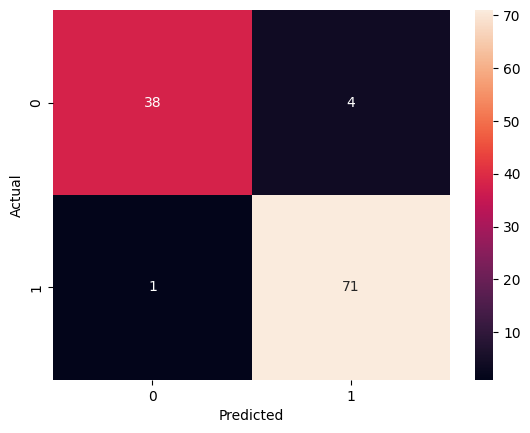

In [4]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cat = CatBoostClassifier(verbose=0)
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Question 10
### You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and categorical features.        Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model




**Step 1: Data Preprocessing**
- Handle missing values using mean/median
- Encode categorical features
- Handle class imbalance using class weights or SMOTE

**Step 2: Model Choice**
- Prefer **CatBoost** due to mixed data types
- Use **XGBoost** for performance tuning

**Step 3: Hyperparameter Tuning**
- GridSearchCV or RandomizedSearchCV
- Tune learning rate, depth, and estimators

**Step 4: Evaluation Metrics**
- Precision, Recall, F1-score
- ROC-AUC for imbalanced data

**Step 5: Business Impact**
- Reduces financial risk
- Improves loan approval decisions
- Increases profitability and trust
